In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/mushrooms.csv')

In [3]:
X = df.drop('class',axis = 1)

In [4]:
X = pd.get_dummies(X,drop_first=True,dtype='int')

In [5]:
y = df['class']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.1, random_state=101)

In [8]:
from sklearn.ensemble import GradientBoostingClassifier

In [9]:
from sklearn.model_selection import GridSearchCV

In [12]:
param_grid = {'n_estimators':[50,100],
              'learning_rate':[0.1,0.05,0.2],
              'max_depth':[3,4,5]
             }


In [13]:
gd_model = GradientBoostingClassifier()

In [14]:
grid = GridSearchCV(gd_model,param_grid)

In [15]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]})

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,classification_report,accuracy_score

In [17]:
predictions = grid.predict(X_test)

In [19]:
# predictions
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

In [22]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       444
           p       1.00      1.00      1.00       369

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



In [24]:
# grid.best_estimator_.feature_importances_

In [25]:
feat_import = grid.best_estimator_.feature_importances_

In [26]:
imp_feat = pd.DataFrame(index=X.columns,
                        data=feat_import,columns=['Importance'])

In [28]:
imp_feat = imp_feat[imp_feat['Importance'] > 0.0005]

In [29]:
imp_feat

,Importance
cap-surface_g,0.001687
cap-color_y,0.002390
bruises_t,0.054585
odor_f,0.014309
odor_l,0.020737
odor_n,0.615608
odor_p,0.003846
gill-spacing_w,0.012193
gill-size_n,0.012212
stalk-root_c,0.128926


In [31]:
imp_feat = imp_feat.sort_values('Importance')

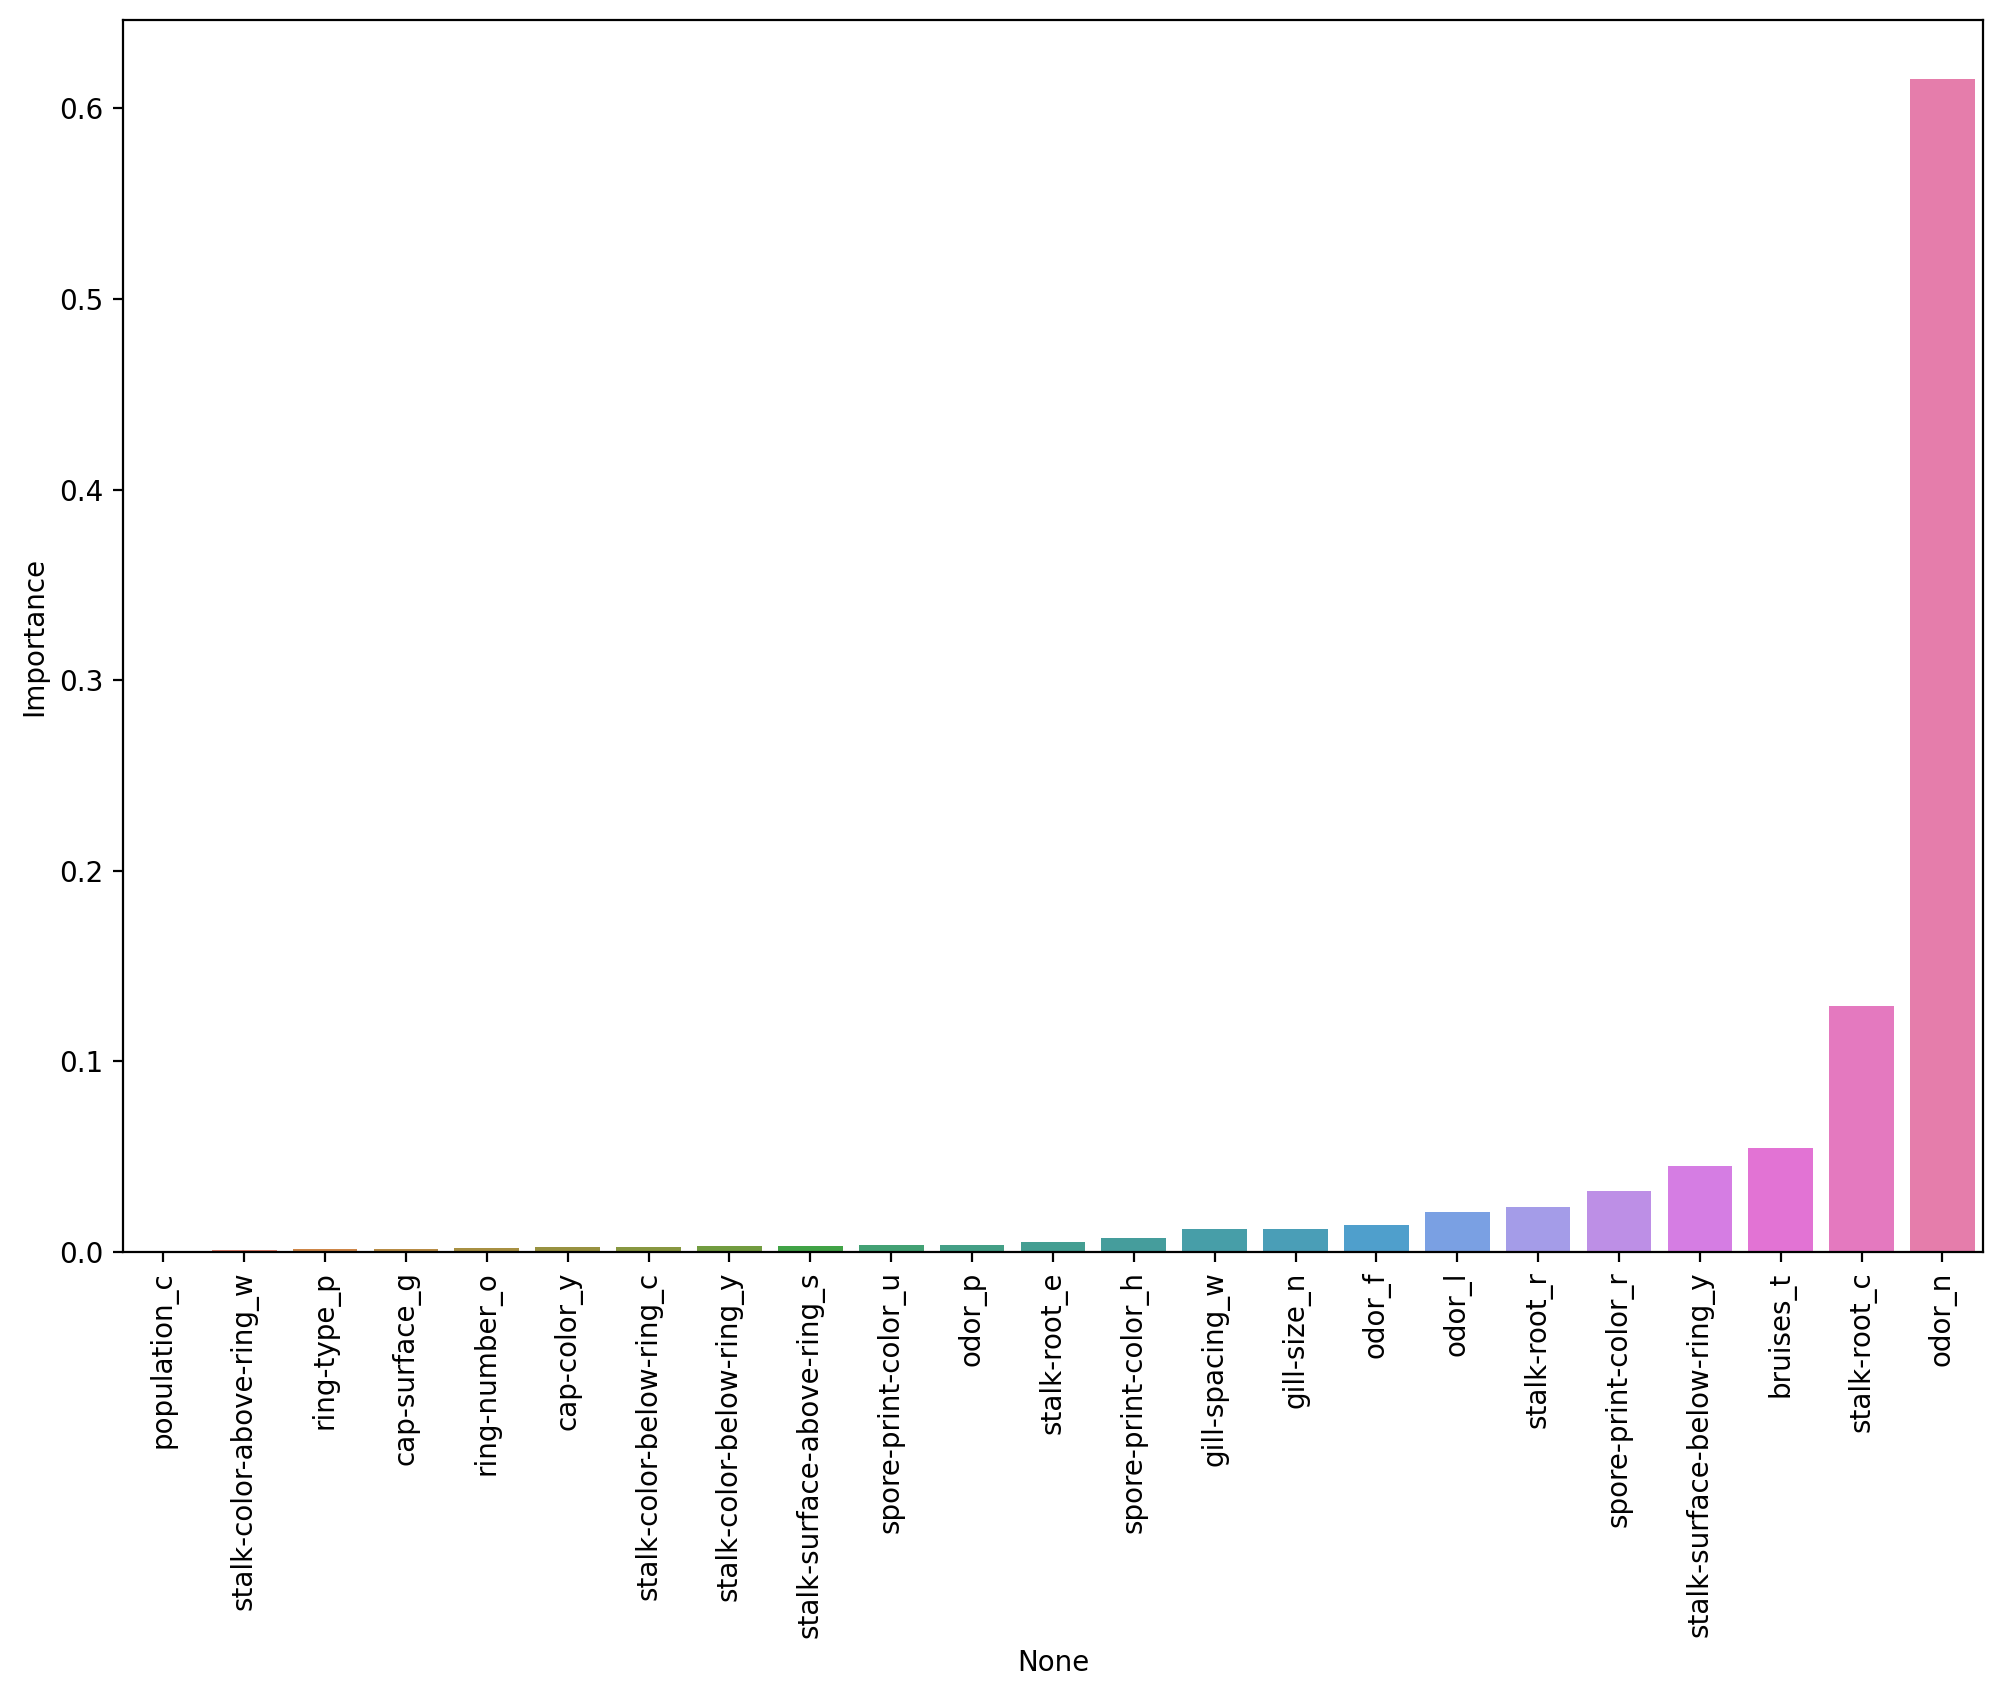

In [37]:
plt.figure(figsize=(12,8),dpi=200)

sns.barplot(data=imp_feat,
            x = imp_feat.index,
            y = 'Importance',
           hue = imp_feat.index)
plt.xticks(rotation=90);

In [38]:
# imp_feat